# Monte Carlo Option Pricing

Import the packages and parameters we need for this question.

In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


In [45]:
r = 0.08    # Risk-free rate
T = 1       # Time to expiry
K = 101     # Strike price
S0 = 100    # Initial asset price
gamma = 20
epsilon = 10**(-8)

Write the Monte Carlo option pricing function for European puts.

In [46]:
def MCOP_EP(M, delt):
    # M is the number of simulations
    # delt is the time step size
    N = T/delt
    S = np.ones(M)*S0 # vectorized initial price
    i = 0
    while i < N:
        sigma = gamma/S # volatility function
        phi = np.random.normal(0, 1, M) # normal distribution
        dZ = phi*math.sqrt(delt) # increament of Wiener process
        dS = r*S*delt + sigma*S*dZ # asset price evolution
        SN = np.maximum(S + dS, np.ones(M)*epsilon) # updated price
        i = i + 1
        S = SN
    Payoff = np.maximum(K - S, np.zeros(M)) # payoff for European puts
    V = math.exp(-r*T)*sum(Payoff)/M # Monte Carlo estimate of the option price
    SD = math.sqrt(sum((math.exp(-r*T)*Payoff - V)**2)/(M-1)) # SD for 95% CI
    return V, SD

Generate the 3 plots with the corresponding timestep size.

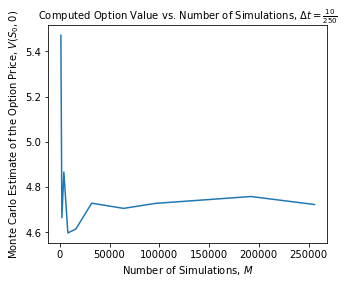

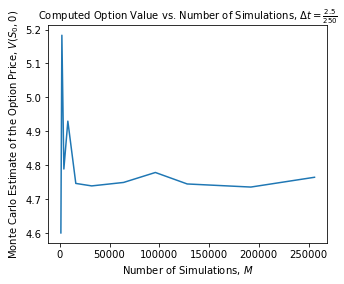

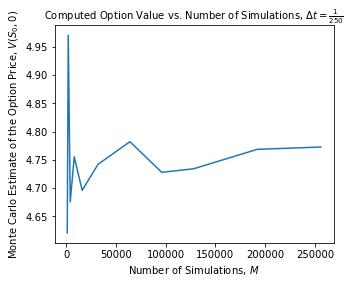

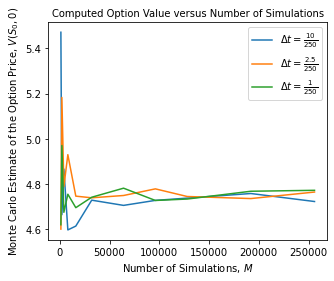

In [47]:
# Number of simulations
M = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 96000, 128000, 192000, 256000]

# delt values
delt1 = 10/250
delt2 = 2.5/250
delt3 = 1/250

# Monte Carlo estimates
MC_estimate1 = [MCOP_EP(1000, delt1)[0],
                MCOP_EP(2000, delt1)[0],
                MCOP_EP(4000, delt1)[0],
                MCOP_EP(8000, delt1)[0],
                MCOP_EP(16000, delt1)[0],
                MCOP_EP(32000, delt1)[0],
                MCOP_EP(64000, delt1)[0],
                MCOP_EP(96000, delt1)[0],
                MCOP_EP(128000, delt1)[0],
                MCOP_EP(192000, delt1)[0],
                MCOP_EP(256000, delt1)[0]]
MC_estimate2 = [MCOP_EP(1000, delt2)[0],
                MCOP_EP(2000, delt2)[0],
                MCOP_EP(4000, delt2)[0],
                MCOP_EP(8000, delt2)[0],
                MCOP_EP(16000, delt2)[0],
                MCOP_EP(32000, delt2)[0],
                MCOP_EP(64000, delt2)[0],
                MCOP_EP(96000, delt2)[0],
                MCOP_EP(128000, delt2)[0],
                MCOP_EP(192000, delt2)[0],
                MCOP_EP(256000, delt2)[0]]
MC_estimate3 = [MCOP_EP(1000, delt3)[0],
                MCOP_EP(2000, delt3)[0],
                MCOP_EP(4000, delt3)[0],
                MCOP_EP(8000, delt3)[0],
                MCOP_EP(16000, delt3)[0],
                MCOP_EP(32000, delt3)[0],
                MCOP_EP(64000, delt3)[0],
                MCOP_EP(96000, delt3)[0],
                MCOP_EP(128000, delt3)[0],
                MCOP_EP(192000, delt3)[0],
                MCOP_EP(256000, delt3)[0]]

# 3 plots with the corresponding timestep size
plt.rcParams['figure.figsize'] = [5, 4]
plot1 = plt.plot(M, MC_estimate1)
plt.title("Computed Option Value vs. Number of Simulations, $\Delta t=\\frac{10}{250}$", fontsize = 10)
plt.ylabel("Monte Carlo Estimate of the Option Price, $V(S_0,0)$", fontsize = 10)
plt.xlabel("Number of Simulations, $M$", fontsize = 10)
plt.show()
plt.rcParams['figure.figsize'] = [5, 4]
plot2 = plt.plot(M, MC_estimate2)
plt.title("Computed Option Value vs. Number of Simulations, $\Delta t=\\frac{2.5}{250}$", fontsize = 10)
plt.ylabel("Monte Carlo Estimate of the Option Price, $V(S_0,0)$", fontsize = 10)
plt.xlabel("Number of Simulations, $M$", fontsize = 10)
plt.show()
plt.rcParams['figure.figsize'] = [5, 4]
plot3 = plt.plot(M, MC_estimate3)
plt.title("Computed Option Value vs. Number of Simulations, $\Delta t=\\frac{1}{250}$", fontsize = 10)
plt.ylabel("Monte Carlo Estimate of the Option Price, $V(S_0,0)$", fontsize = 10)
plt.xlabel("Number of Simulations, $M$", fontsize = 10)
plt.show()

# Put 3 plots together for observation
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(M, MC_estimate1, label = "$\Delta t = \\frac{10}{250}$")
plt.plot(M, MC_estimate2, label = "$\Delta t = \\frac{2.5}{250}$")
plt.plot(M, MC_estimate3, label = "$\Delta t = \\frac{1}{250}$")
plt.title("Computed Option Value versus Number of Simulations", fontsize = 10)
plt.ylabel("Monte Carlo Estimate of the Option Price, $V(S_0,0)$", fontsize = 10)
plt.xlabel("Number of Simulations, $M$", fontsize = 10)
plt.legend(loc = "upper right")
plt.show()

Observation:

> As the number of simulations gets larger, it is shown that the Monte Carlo estimates of the option prices in three plots all converge to a stable level in the end.

> By putting three plots in one plot, it is shown that the smaller the $\Delta t$, the faster the convergence.

Generate a simplet text table containing $M$, the estimated option values, and the lower and upper bound values of the $95\%$ confidence interval.

In [48]:
# SD for the smallest delt
MC_SD3 = [MCOP_EP(1000, delt3)[1],
          MCOP_EP(2000, delt3)[1],
          MCOP_EP(4000, delt3)[1],
          MCOP_EP(8000, delt3)[1],
          MCOP_EP(16000, delt3)[1],
          MCOP_EP(32000, delt3)[1],
          MCOP_EP(64000, delt3)[1],
          MCOP_EP(96000, delt3)[1],
          MCOP_EP(128000, delt3)[1],
          MCOP_EP(192000, delt3)[1],
          MCOP_EP(256000, delt3)[1]]

# Lower and upper bound values of the 95% CI
LB = MC_estimate3 - np.multiply(norm.ppf(1-(1-0.95)/2),MC_SD3)/np.sqrt(M)
UB = MC_estimate3 + np.multiply(norm.ppf(1-(1-0.95)/2),MC_SD3)/np.sqrt(M)

# Simple text table for the smallest delt
table = {"M": M,
         "V": MC_estimate3,
         "Lower Bounds": LB,
         "Upper Bounds": UB}
print(tabulate(table, headers="keys", tablefmt="grid"))

+--------+---------+----------------+----------------+
|      M |       V |   Lower Bounds |   Upper Bounds |
+========+=========+================+================+
|   1000 | 4.62086 |        4.06083 |        5.18089 |
+--------+---------+----------------+----------------+
|   2000 | 4.97082 |        4.60929 |        5.33234 |
+--------+---------+----------------+----------------+
|   4000 | 4.67574 |        4.4022  |        4.94928 |
+--------+---------+----------------+----------------+
|   8000 | 4.75562 |        4.55966 |        4.95158 |
+--------+---------+----------------+----------------+
|  16000 | 4.69627 |        4.55536 |        4.83718 |
+--------+---------+----------------+----------------+
|  32000 | 4.74238 |        4.64568 |        4.83908 |
+--------+---------+----------------+----------------+
|  64000 | 4.78235 |        4.71338 |        4.85131 |
+--------+---------+----------------+----------------+
|  96000 | 4.72811 |        4.67167 |        4.78455 |
+--------+